In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

#https://www.kaggle.com/datasets/mirichoi0218/insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


EDA

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: >

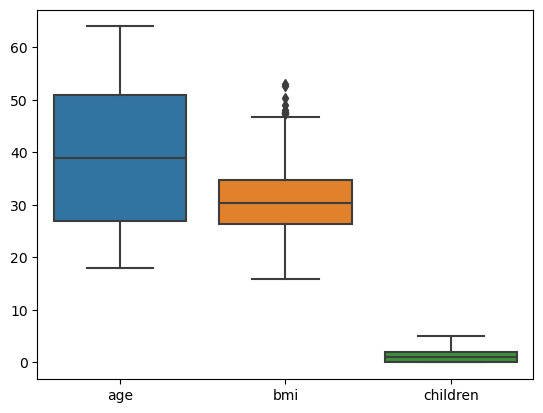

In [7]:
sns.boxplot(df[['age', 'bmi', 'children']])
# max bmi and charges seems to be an anomaly

<Axes: >

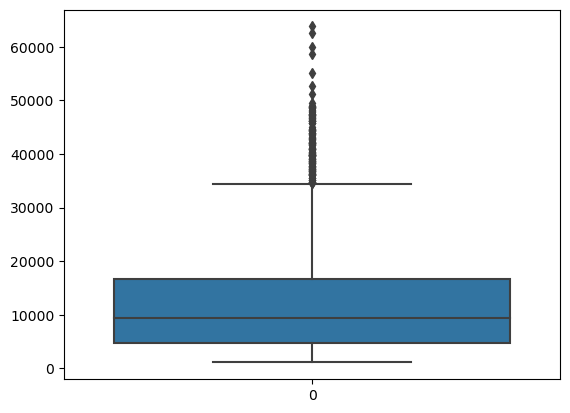

In [15]:
sns.boxplot(df['charges'])

In [10]:
df[['age', 'bmi', 'children', 'charges']].corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: >

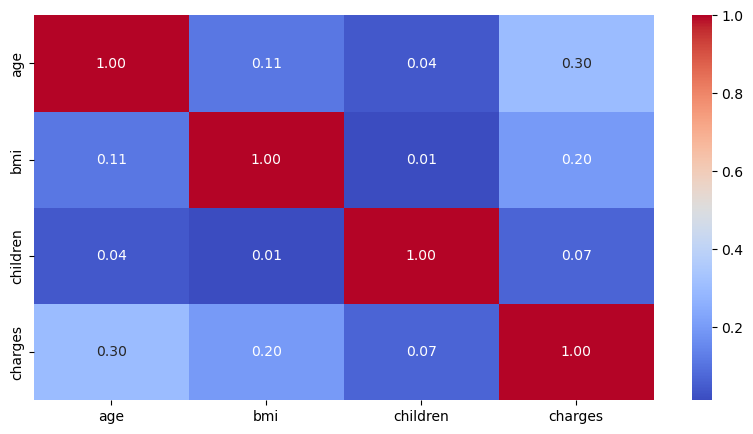

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(df[['age', 'bmi', 'children', 'charges']].corr(), annot=True, cmap='coolwarm', fmt='.2f')

# No multicolinearity so no variables need to be removed and minimal feature engineering in terms of combining variables 

/Users/rohan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


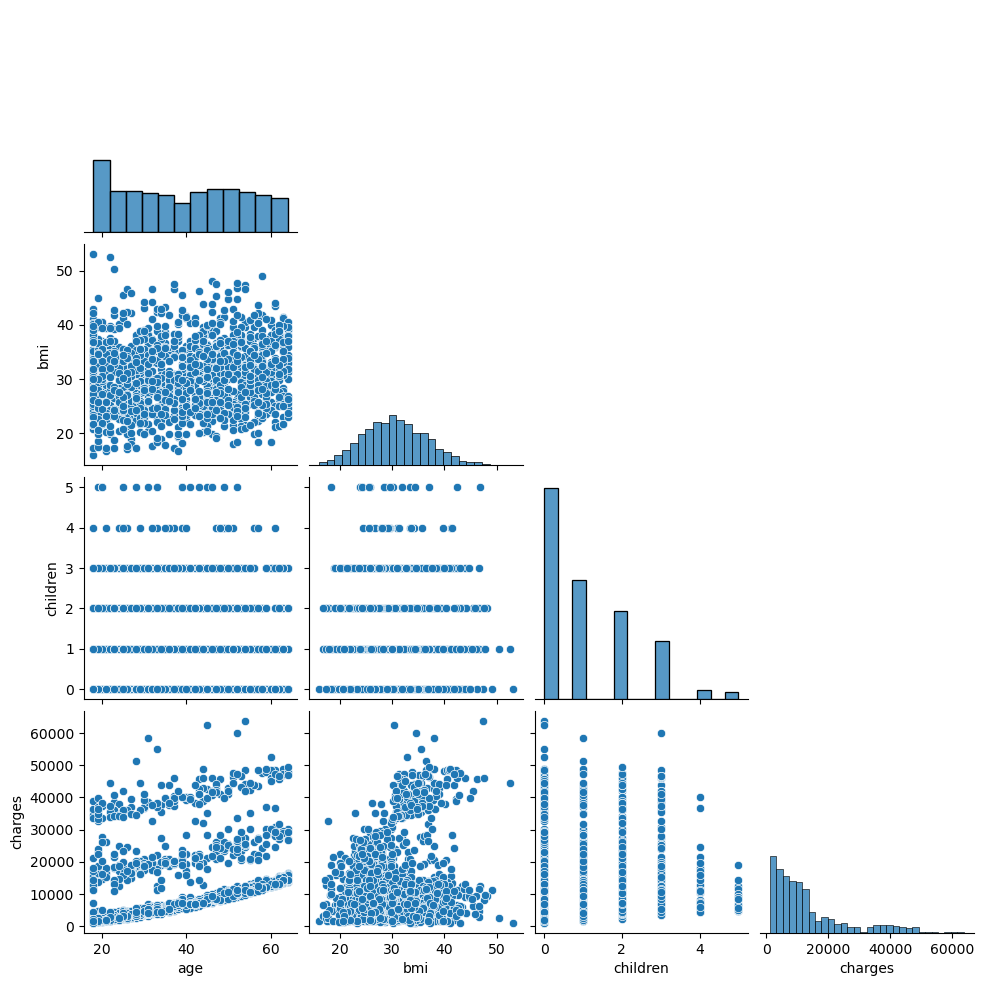

In [14]:
sns.pairplot(df[['age', 'bmi', 'children', 'charges']], corner=True)

In [52]:
# charges and age can be feature engineered to create a more linear relationship
# charges and bmi may be non linear and can be feature engineered as well 

In [17]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [18]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [20]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [21]:
df['children'].value_counts()
# 5 seems pretty low in volume
# could maybe bin it with 4 if similar 

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [22]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [23]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [69]:
'''
Imporvements:
1. Test assumptions
2. Remove charges anomaly?
3. Feature engineer age (connect to smoker as interaction term possibly? - to check) and bmi
4. Bin 4+ for children?
'''

'\nImporvements:\n1. Test assumptions\n2. Remove charges anomaly?\n3. Feature engineer age (connect to smoker as interaction term possibly? - to check) and bmi\n4. Bin 4+ for children?\n'

Before optimising model, conduct one-hot encoding and scaling for base model

In [31]:
df1 = pd.get_dummies(df, columns = ['sex', 'children', 'smoker', 'region'], dtype=int, drop_first=True)
# Creating new dataframe in case I want to make adjustments and do not change the initial df 

In [32]:
df1.head()

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0


In [33]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [36]:
df1[['age', 'bmi']] = sc.fit_transform(df1[['age', 'bmi']])

In [37]:
df1.head()

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,16884.92400,0,0,0,0,0,0,1,0,0,1
1,-1.509965,0.509621,1725.55230,1,1,0,0,0,0,0,0,1,0
2,-0.797954,0.383307,4449.46200,1,0,0,1,0,0,0,0,1,0
3,-0.441948,-1.305531,21984.47061,1,0,0,0,0,0,0,1,0,0
4,-0.513149,-0.292556,3866.85520,1,0,0,0,0,0,0,1,0,0


Basic Model

In [38]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [39]:
from sklearn.model_selection import train_test_split

X = df1.drop(columns = ['charges'])
y = df1['charges']

X_test, X_train, y_test, y_train = train_test_split(X,y,train_size=0.2)

In [40]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape

((267, 12), (267,), (1071, 12), (1071,))

In [41]:
lr.fit(X_train, y_train)

LinearRegression()

In [48]:
y_predict_train = lr.predict(X_train)
y_predict = lr.predict(X_test)

In [51]:
from sklearn.metrics import r2_score

r2_score(y_test, y_predict)

0.6981451977144355

In [50]:
r2_score(y_train, y_predict_train)

0.7605876702339897

In [45]:
# Doing same model with OLS to get summary table 

In [47]:
import statsmodels.api as sm

X_train1 = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train1).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     280.1
Date:                Sat, 20 Jul 2024   Prob (F-statistic):          3.36e-318
Time:                        19:00:38   Log-Likelihood:                -10842.
No. Observations:                1071   AIC:                         2.171e+04
Df Residuals:                    1058   BIC:                         2.178e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             8890.3571    480.566     18.500      0.000    7947.386    9833.328
age               3419.7813    187.600     18.229      0.000    3051.670    3787.893
bmi               2124.6705    195.213     10.884      0.000    1741.621    2507.720
sex_male          -437.5102    373.079     -1.173      0.241   -1169.569     294.549
children_1           4.4094    471.442      0.009      0.993    -920.658     929.477
children_2        1819.5440    530.662      3.429      0.001     778.275    2860.813
children_3         781.6572    602.819      1.297      0.195    -401.200    1964.514
children_4        2864.0322   1298.473      2.206      0.028     316.158    5411.906
children_5         944.5883   1654.077      0.571      0.568   -2301.055    4190.232
smoker_yes        2.432e+04    459.039     52.983      0.000    2.34e+04    2.52e+04
region_northwest  -533.4535    536.125     -0.995      0.320   -1585.442     518.535
region_southeast -1255.8443    541.898     -2.317      0.021   -2319.162    -192.526
region_southwest -1115.4626    537.669     -2.075      0.038   -2170.482     -60.443
==============================================================================
Omnibus:                      216.874   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              487.993
Skew:                           1.112   Prob(JB):                    1.08e-106
Kurtosis:                       5.447   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Testing LR assumptions now

<Axes: ylabel='charges'>

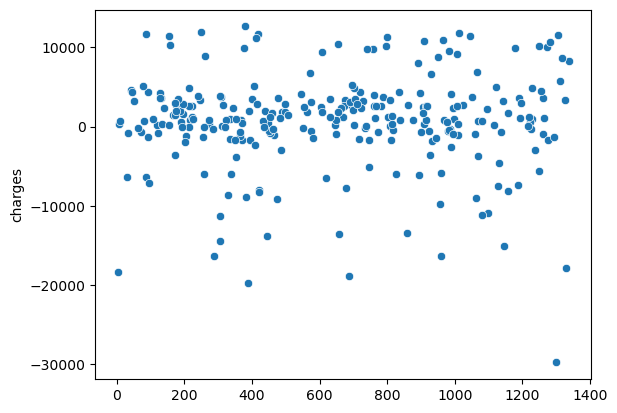

In [72]:
# Linearity 

residuals = y_predict - y_test 

sns.scatterplot(residuals)
# Does not seem to show any non-linear trends where it is eg. curved shape or systemic change in spread 

<Axes: xlabel='charges', ylabel='Count'>

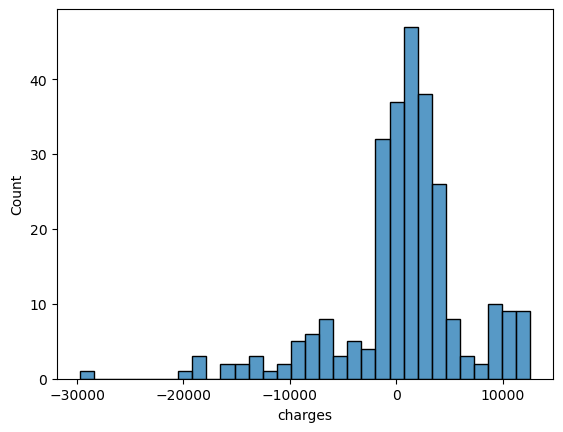

In [73]:
# Normality of error terms

sns.histplot(residuals)

# The error terms are not normally distributed 
# Likely causes is due to outliars (far left data point below)

In [68]:
# Mulit-collinearity among predictors

# Heatmap of correlation above confirmed no correlation; VIF another method to check

In [71]:
# No autocorrelation of error terms

# In model summary it is 1.97, which is between the ideal 1.5 -2.5 

In [75]:
# Homoscedasticity 

# Looking at the resdiauls scatterplot, there may be heteroskedasticity since there are tighter and more spread out regions; it is not a 
# constant spread.

# This could affect significance tests (given standard errors are biased). Will attempt to log transform the dependent variable to see if helps.abs

In [78]:
# Log transformation or polynomial changes do not seem needed since linearity assumptions achieved; Other feature engineering will be looked 
# into to imporve the accuracy score.

# Linearity assumptions: https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/

Optimised model

In [81]:
df1.head()

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,16884.92400,0,0,0,0,0,0,1,0,0,1
1,-1.509965,0.509621,1725.55230,1,1,0,0,0,0,0,0,1,0
2,-0.797954,0.383307,4449.46200,1,0,0,1,0,0,0,0,1,0
3,-0.441948,-1.305531,21984.47061,1,0,0,0,0,0,0,1,0,0
4,-0.513149,-0.292556,3866.85520,1,0,0,0,0,0,0,1,0,0


<Axes: xlabel='age', ylabel='charges'>

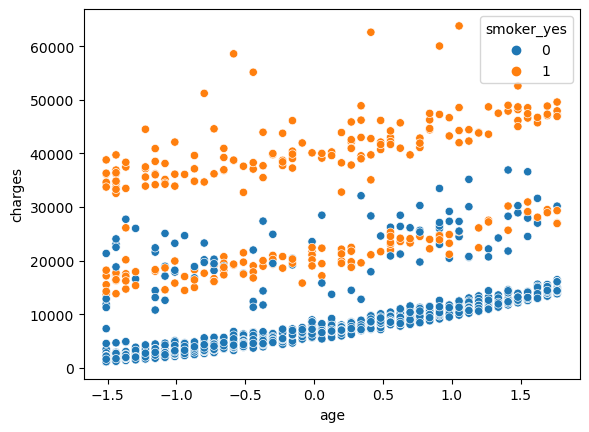

In [83]:
# To see if splitting by smoker can help unpack the scatterplot fo charges and age

sns.scatterplot(data = df1[['charges', 'age', 'smoker_yes']], x='age', y='charges', hue='smoker_yes')

In [87]:
# Above shows how smoker has a clear split in charges and therefore, introducing an interaction variable should help with this joint effect
# Intuitively makes sense since a smoker results in higher charges due to possible health risks

In [92]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<Axes: xlabel='bmi', ylabel='charges'>

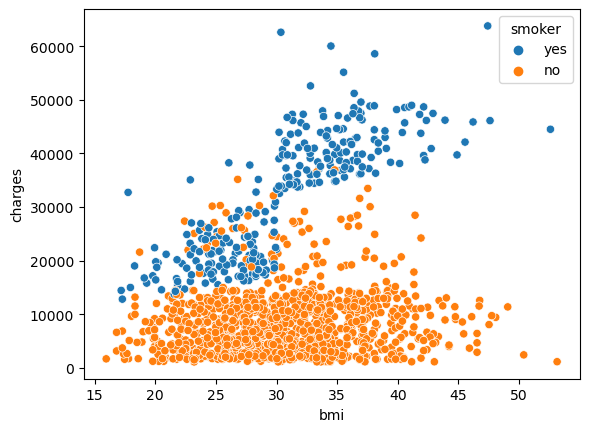

In [93]:
# Seeing if bmi has different sub-population effects (like with age) and if interaction terms may help here with the non-linearity.

sns.scatterplot(data = df[['charges', 'bmi', 'smoker']], x='bmi', y='charges', hue = 'smoker')

<Axes: xlabel='bmi', ylabel='charges'>

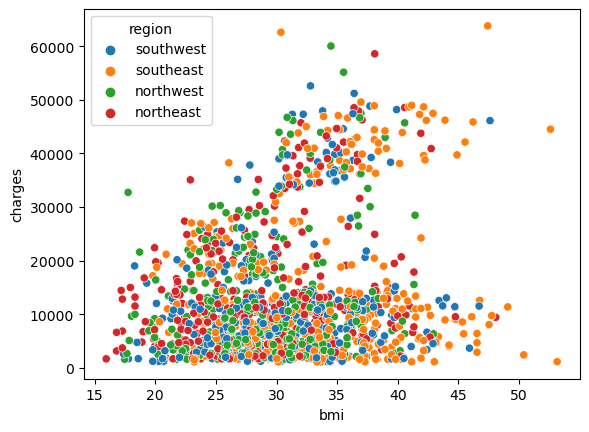

In [94]:
sns.scatterplot(data = df[['charges', 'bmi', 'region']], x='bmi', y='charges', hue = 'region')

<Axes: xlabel='bmi', ylabel='charges'>

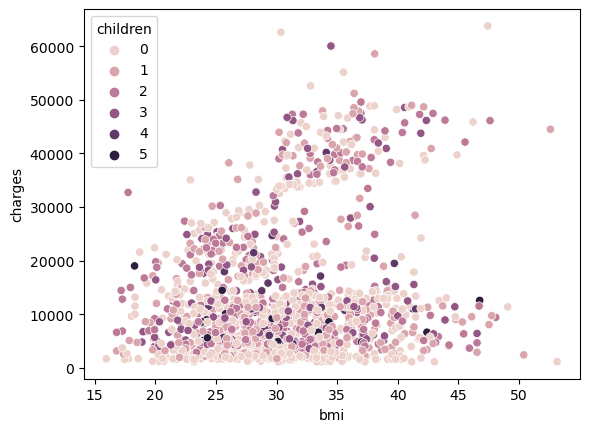

In [96]:
sns.scatterplot(data = df[['charges', 'bmi', 'children']], x='bmi', y='charges', hue = 'children')

In [ ]:
# Smoker seems to be impacted bmi as well and an interaction term may be applied for this as well.

In [123]:
# To help with the spread increasing as bmi rises, log transformation will be done on charges.
# Polynomial terms could be added, howeverm interaction and log should be enough. Will be decided after obtaining the accuracy.

In [100]:
df1['charges'] = np.log(df1['charges'])

In [101]:
# Adding interaction terms

df1['age_smoker'] = df1['age'] * df1['smoker_yes']
df1['bmi_smoker'] = df1['bmi'] * df1['smoker_yes']

In [102]:
df1.head()

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest,age_smoker,bmi_smoker
0,-1.438764,-0.453320,9.734176,0,0,0,0,0,0,1,0,0,1,-1.438764,-0.45332
1,-1.509965,0.509621,7.453302,1,1,0,0,0,0,0,0,1,0,-0.000000,0.00000
2,-0.797954,0.383307,8.400538,1,0,0,1,0,0,0,0,1,0,-0.000000,0.00000
3,-0.441948,-1.305531,9.998092,1,0,0,0,0,0,0,1,0,0,-0.000000,-0.00000
4,-0.513149,-0.292556,8.260197,1,0,0,0,0,0,0,1,0,0,-0.000000,-0.00000


In [106]:
# Bin 4+ children?

df.groupby('children')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
0,574.0,12365.975602,12023.293942,1121.8739,2734.421150,9856.95190,14440.123825,63770.42801
1,324.0,12731.171832,11823.631451,1711.0268,4791.643175,8483.87015,15632.052050,58571.07448
2,240.0,15073.563734,12891.368347,2304.0022,6284.939438,9264.97915,20379.276748,49577.66240
3,157.0,15355.318367,12330.869484,3443.0640,6652.528800,10600.54830,19199.944000,60021.39897
4,25.0,13850.656311,9139.223321,4504.6624,7512.267000,11033.66170,17128.426080,40182.24600
5,18.0,8786.035247,3808.435525,4687.7970,5874.973900,8589.56505,10019.943975,19023.26000


<Axes: xlabel='children', ylabel='charges'>

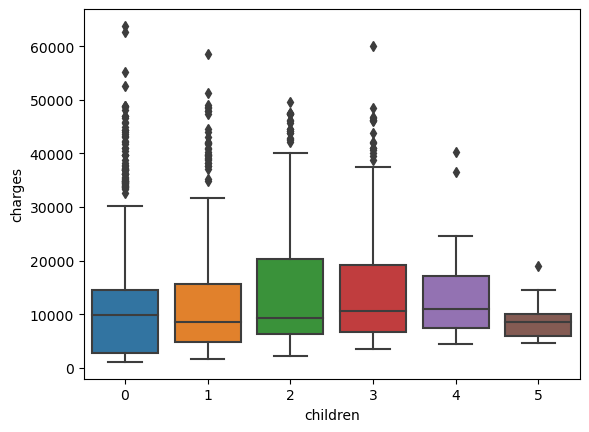

In [108]:
sns.boxplot(data=df, x='children', y='charges')

In [109]:
# Binning 4 and 5 would have been a good idea given low population size, however, their distributions relative to charges seem to be different 
# so it won't be a good idea to combine them.

Evaluate imporved model and test if Homoscedasticity assumption still violated

In [110]:
lr1 = LinearRegression()

X = df1.drop(columns = ['charges'])
y = df1['charges']

X_test, X_train, y_test, y_train = train_test_split(X,y,train_size=0.2)

In [111]:
lr1.fit(X_train, y_train)

LinearRegression()

In [117]:
y_pred = lr1.predict(X_test)
r2_score(y_test, y_pred)

# Much higher than before, which was 69%

0.8659475680819451

In [120]:
y_pred_train = lr1.predict(X_train)
r2_score(y_train, y_pred_train)

# Surprisngly, training data r2 was lower than test data.

0.8167465281026887

In [115]:
# OLS model again to see summary

X_train1 = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train1).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     336.2
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        19:12:55   Log-Likelihood:                -517.56
No. Observations:                1071   AIC:                             1065.
Df Residuals:                    1056   BIC:                             1140.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.7965      0.031  

<Axes: ylabel='charges'>

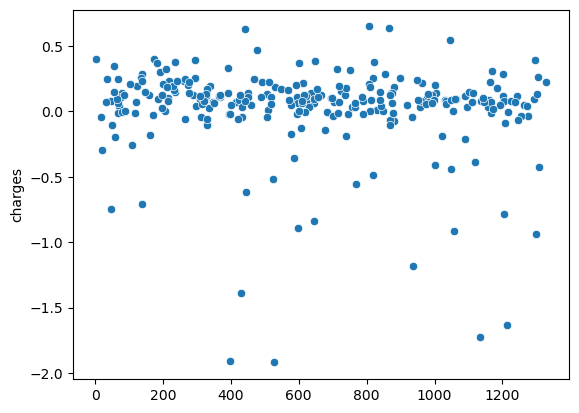

In [124]:
residuals = y_pred - y_test 

sns.scatterplot(residuals)

# Residuals look much better, and Homoscedasticity assumption likely to not be violated anymore (subject to minimal volatility) 

In [125]:
# Anomolies likely could have been focused on more to possibly help the individuals points spread out and the bottom. 

In [131]:
# Other

In [132]:
# Testing and understanding if remove BMI interaction, is it worse or better.
df2 = df1.drop(['bmi_smoker'], axis=1).copy()

In [133]:
lr3 = LinearRegression()

X = df2.drop(columns = ['charges'])
y = df2['charges']

X_test, X_train, y_test, y_train = train_test_split(X,y,train_size=0.2)

lr3.fit(X_train, y_train)

y_pred = lr3.predict(X_test)
r2_score(y_test, y_pred)

# Seems this was an incremental increase to the accuracy and makes sense to keep in, since previous r2 was 87% and has been lowered after
# being removed.

0.8113164353492335